# Content Based Recommendation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
m_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_csv('data/ml-100k/u.item', sep='|', names=m_cols,
encoding='latin-1')
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Remove space in columns
movies.columns = movies.columns.str.replace(" ", "_")
movies.columns = movies.columns.str.replace("'", "")

In [5]:
movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Seems like video release date has all entries missing

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Childrens           1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [7]:
movies.movie_title.fillna("", inplace=True)

(-0.5, 499.5, 299.5, -0.5)

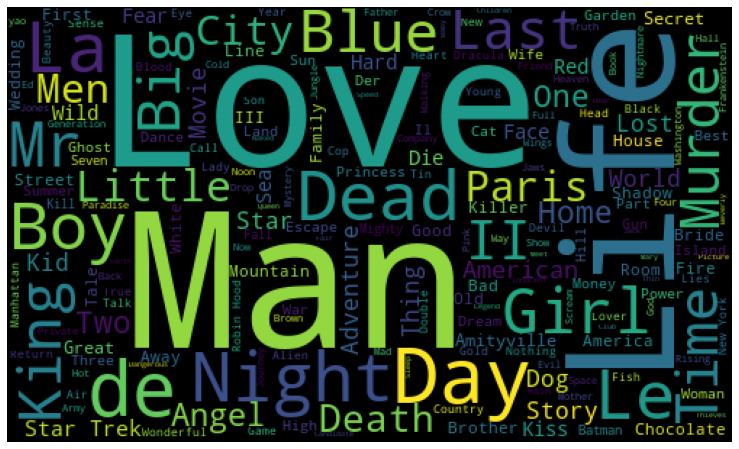

In [8]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

title_corpus = ' '.join(movies.movie_title)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", width=500, height=300).generate(title_corpus)

plt.figure(figsize=(16, 8))
plt.imshow(title_wordcloud)
plt.axis("off")

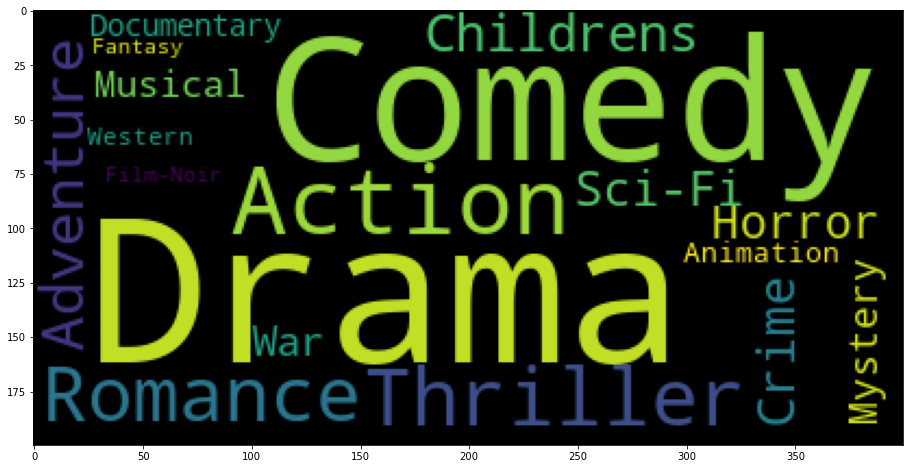

In [9]:
genre_counts = movies.loc[:, "Action": ].sum()
genre_wordcloud = WordCloud().generate_from_frequencies(genre_counts)

plt.figure(figsize=(16, 8))
plt.imshow(genre_wordcloud)

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

X = movies.loc[:, "Action":]
sim_matrix = cosine_similarity(X)
sim_df = pd.DataFrame(sim_matrix, index=movies.movie_id, columns=movies.movie_id)
indices = pd.Series(movies.index, index=movies.movie_title)


In [19]:
# TODO: Recommendation of more than one movie, return as a dataframe
def recommend(title, n=5):
    idx = indices[title]
    sim_scores = list(enumerate(sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores if i[0] != idx]
    
    return movies.movie_title.iloc[movie_indices[0:n]]


In [20]:
title = 'Basic Instinct (1992)'

In [21]:
recommend(title)

290       Absolute Power (1997)
321       Murder at 1600 (1997)
332            Game, The (1997)
478              Vertigo (1958)
504    Dial M for Murder (1954)
Name: movie_title, dtype: object

In [13]:
u_cols = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_csv("data/ml-100k/u.user", sep="|", names=u_cols, encoding="latin-1")
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
r_cols = ["user_id", "movie_id", "rating", "unix_timestamp"]
ratings = pd.read_csv("data/ml-100k/u.data", names=r_cols, sep="\t", encoding="latin-1")
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [15]:
mov_rat = ratings.merge(movies, on='movie_id', how='left')
mov_rat.head()

,user_id,movie_id,rating,unix_timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
mov_rat.shape

(100000, 27)

In [17]:
mov_rat.loc[:, 'Action': ] = mov_rat.loc[:, 'Action':].values * mov_rat['rating'].values.reshape(-1, 1)

In [18]:
user_rating_norm = mov_rat.loc[:, ['rating', 'user_id']].groupby('user_id').sum()

In [30]:
user_rating_norm

,rating
user_id,
1,982
2,230
3,151
4,104
5,503
...,...
939,209
940,370
941,89


In [23]:
user_profile = mov_rat.groupby('user_id').mean().loc[:, 'Action':]

In [24]:
user_rating_norm.shape


(943, 1)

In [25]:
user_profile.loc[:, 'Action':] = user_profile.loc[:, 'Action':].values/user_rating_norm.values

In [26]:
user_profile

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
user_id,,,,,,,,,,,,,,,,,,
1,0.000936,0.000460,0.000150,0.000206,0.001183,0.000322,0.000090,0.001572,0.000026,0.000019,0.000168,0.000142,0.000067,0.000648,0.000644,0.000704,0.000344,0.000082
2,0.002665,0.000912,0.000281,0.000842,0.004278,0.002384,0.000000,0.009397,0.000210,0.000631,0.000421,0.000210,0.000982,0.004628,0.001052,0.003015,0.000771,0.000000
3,0.004783,0.001717,0.000000,0.000000,0.003802,0.003679,0.000613,0.007849,0.000000,0.000613,0.001472,0.000491,0.004292,0.002085,0.002698,0.006500,0.001717,0.000000
4,0.012420,0.005609,0.000000,0.000000,0.008013,0.007612,0.002003,0.010817,0.000000,0.000000,0.001603,0.002003,0.008013,0.005208,0.009215,0.017228,0.003606,0.000000
5,0.001999,0.001216,0.000602,0.000807,0.002795,0.000398,0.000000,0.000818,0.000057,0.000057,0.000807,0.000454,0.000102,0.000500,0.001318,0.000636,0.000511,0.000057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.007128,0.003418,0.000391,0.000391,0.006640,0.001269,0.000000,0.008007,0.000391,0.000000,0.000293,0.000391,0.000391,0.004687,0.003222,0.004785,0.001465,0.000000
940,0.001995,0.000909,0.000227,0.000530,0.003738,0.000758,0.000000,0.004370,0.000000,0.000303,0.000303,0.000556,0.000328,0.002147,0.001465,0.001692,0.001238,0.000000
941,0.019408,0.013790,0.007150,0.004597,0.014811,0.001532,0.000000,0.010725,0.000000,0.000000,0.000000,0.002043,0.002554,0.002554,0.015832,0.014300,0.002554,0.000000


In [36]:
movies_vector = movies.loc[:, "Action":].set_index(movies.movie_id)

In [37]:
movies_vector

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1679,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1680,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [39]:
user_mov_sim = pd.DataFrame(cosine_similarity(user_profile, movies_vector), index=user_profile.index, columns=movies_vector.index)

In [40]:
user_mov_sim

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.344605,0.470373,0.273022,0.826716,0.581888,0.609943,0.607921,0.663218,0.609943,0.525769,...,0.449779,0.609943,0.609943,0.609943,0.609943,0.609943,0.370708,0.608948,0.458910,0.609943
2,0.250529,0.305840,0.242324,0.758093,0.686514,0.755148,0.593743,0.673499,0.755148,0.577804,...,0.322773,0.755148,0.755148,0.755148,0.755148,0.755148,0.434349,0.796971,0.343762,0.755148
3,0.157661,0.539100,0.466874,0.681504,0.747620,0.563773,0.535683,0.483156,0.563773,0.485852,...,0.573056,0.563773,0.563773,0.563773,0.563773,0.563773,0.436021,0.504538,0.273077,0.563773
4,0.152397,0.670546,0.567512,0.594347,0.678165,0.356344,0.466618,0.358132,0.356344,0.335965,...,0.690594,0.356344,0.356344,0.356344,0.356344,0.356344,0.522612,0.373294,0.263959,0.356344
5,0.561865,0.514790,0.147292,0.750166,0.247524,0.189375,0.349650,0.590718,0.189375,0.217601,...,0.431483,0.189375,0.189375,0.189375,0.189375,0.189375,0.185984,0.215742,0.647032,0.189375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.282185,0.582935,0.315121,0.827990,0.534666,0.527345,0.522954,0.571796,0.527345,0.441101,...,0.554786,0.527345,0.527345,0.527345,0.527345,0.527345,0.441101,0.591166,0.437310,0.527345
940,0.365144,0.373349,0.238056,0.820548,0.553870,0.614682,0.580365,0.701568,0.614682,0.557754,...,0.366811,0.614682,0.614682,0.614682,0.614682,0.614682,0.381885,0.648200,0.525855,0.614682
941,0.402015,0.718989,0.374936,0.680333,0.402015,0.281202,0.492366,0.456133,0.281202,0.246183,...,0.624926,0.281202,0.281202,0.281202,0.281202,0.281202,0.312463,0.246183,0.388327,0.281202


In [44]:
user_mov_sim.loc[1, :].sort_values(ascending=False).index

Int64Index([  74,    4, 1138,  337,  517,  170,  512, 1115, 1424,  778,
            ...
            1581,  493,  484,  525, 1576,  488, 1476, 1582,  267, 1373],
           dtype='int64', name='movie_id', length=1682)

In [48]:
def recommend_to_user(user_id, n=5):
    indices = user_mov_sim.loc[user_id, :].sort_values(ascending=False).index[0:n]
    return movies.movie_title[movies.movie_id.isin(indices)]

In [54]:
recommend_to_user(200)

171          Empire Strikes Back, The (1980)
251    Lost World: Jurassic Park, The (1997)
635              Escape from New York (1981)
719                      First Knight (1995)
830                  Escape from L.A. (1996)
Name: movie_title, dtype: object

In [58]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [59]:
def recommend_audience(movie_id, n=5):
    indices = user_mov_sim.loc[:, movie_id].sort_values(ascending=False).index[0:n]
    return indices

In [60]:
recommend_audience(1)

Int64Index([471, 822, 283, 620, 541], dtype='int64', name='user_id')